<a href="https://colab.research.google.com/github/EstebanCabreraArbizu/CC57-Machine_Learning/blob/main/S3-calidad%20de%20los%20datos/03_Identificaci%C3%B3n_y_tratamiento_de_valores_at%C3%ADpicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identificación y tratamiento de valores atípicos

### Docente: M.Sc. Richard Fernández

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [ ]:
data = pd.read_csv('bupa.csv',sep=";")

In [ ]:
data.shape

(345, 7)

In [ ]:
data.head()

,V1,V2,V3,V4,V5,V6,V7
0,85,92,45,27,31,0.0,1
1,85,64,59,32,23,0.0,2
2,86,54,33,16,54,0.0,2
3,91,78,34,24,36,0.0,2
4,87,70,12,28,10,0.0,2


In [ ]:
data.dtypes

V1      int64
V2      int64
V3      int64
V4      int64
V5      int64
V6    float64
V7      int64
dtype: object

In [ ]:
data['V7'] = data.V7.astype(object)

In [ ]:
data.dtypes

V1      int64
V2      int64
V3      int64
V4      int64
V5      int64
V6    float64
V7     object
dtype: object

In [ ]:
data_X = pd.DataFrame(data.drop('V7', axis = 1))
data_X.head()

,V1,V2,V3,V4,V5,V6
0,85,92,45,27,31,0.0
1,85,64,59,32,23,0.0
2,86,54,33,16,54,0.0
3,91,78,34,24,36,0.0
4,87,70,12,28,10,0.0


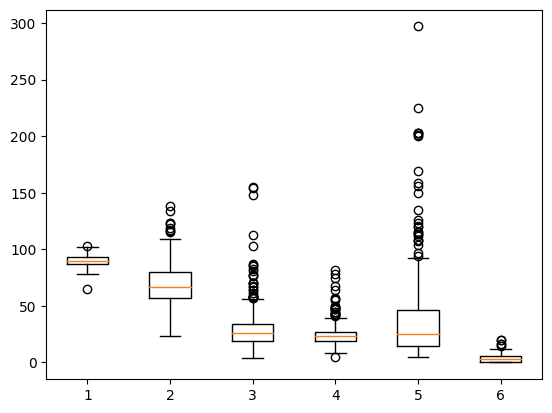

In [ ]:
#1.Boxplot
plt.boxplot(data_X)
plt.show()

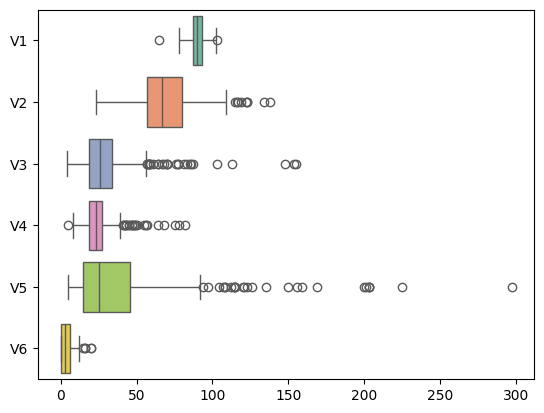

In [ ]:
sns.boxplot(data=data_X, orient="h", palette="Set2")
plt.show()

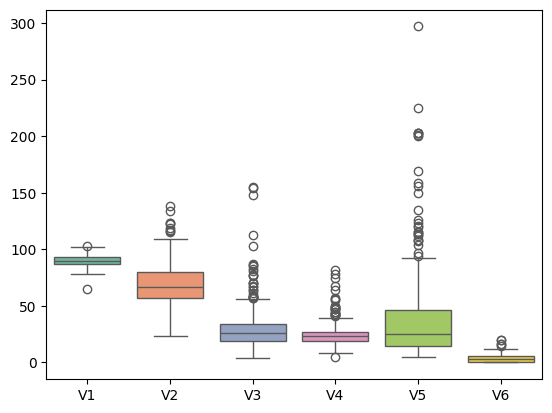

In [ ]:
sns.boxplot(data=data_X, orient="v", palette="Set2")
plt.show()

In [ ]:
#2.Outlier

#Revisar y analizar la siguiente función:

#def z_score_method(df, variable_name):
#    columns = df.columns
#    z = np.abs(stats.zscore(df))
#    threshold = 3
#    outlier = []
#    index=0
#    for item in range(len(columns)):
#        if columns[item] == variable_name:
#            index = item
#    for i, v in enumerate(z[:, index]):
#        if v > threshold:
#            outlier.append(i)
#        else:
#            continue
#    return outlier

In [ ]:
#outlier_z = z_score_method(data_X,"V1")
#print(outlier_z)

In [ ]:
#outlier_z = z_score_method(df=data_X,variable_name='V1')
#print(outlier_z)

In [ ]:
#outlier_z = z_score_method(df=data_X,variable_name='V2')
#print(outlier_z)

In [ ]:
#outlier_z = z_score_method(df=data_X,variable_name='V3')
#print(outlier_z)

In [ ]:
#outlier_z = z_score_method(df=data_X,variable_name='V4')
#print(outlier_z)

In [ ]:
#outlier_z = z_score_method(df=data_X,variable_name='V5')
#print(outlier_z)

In [ ]:
#outlier_z = z_score_method(df=data_X,variable_name='V6')
#print(outlier_z)

In [ ]:
#1.Tratamiento 1
#Las variables se aproximan a una distribución normal

In [ ]:
data_X = pd.DataFrame(data.drop('V7',axis = 1))
data_X.head()

,V1,V2,V3,V4,V5,V6
0,85,92,45,27,31,0.0
1,85,64,59,32,23,0.0
2,86,54,33,16,54,0.0
3,91,78,34,24,36,0.0
4,87,70,12,28,10,0.0


In [ ]:
#Prueba de normalidad
#Ho: las variables se aproximan a una distribución normal
#Ha: las variables NO se aproximan a una distribución normal

#pvalue < 5% => Se rechaza la Ho, a un nivel de confianza de 95%,
#la variable no se aproxima a una distribución normal

#pvalue > 5% => No se rechaza la Ho, a un nivel de confianza de 95%,
#la variable se aproxima a una distribución normal

In [ ]:
stats.shapiro(data_X.V1)

ShapiroResult(statistic=0.9721211791038513, pvalue=3.340998546264018e-06)

In [ ]:
stats.shapiro(data_X.V2)

ShapiroResult(statistic=0.9662437438964844, pvalue=3.605003939810558e-07)

In [ ]:
stats.shapiro(data_X.V3)

ShapiroResult(statistic=0.7289112210273743, pvalue=2.580097543764146e-23)

In [ ]:
stats.shapiro(data_X.V4)

ShapiroResult(statistic=0.8149621486663818, pvalue=1.402879061091299e-19)

In [ ]:
stats.shapiro(data_X.V5)

ShapiroResult(statistic=0.6839386224746704, pvalue=6.481027775730031e-25)

In [ ]:
stats.shapiro(data_X.V6)

ShapiroResult(statistic=0.8354933261871338, pvalue=1.686413543264296e-18)

In [ ]:
#Con un nivel de confianza del 95%, se rechazan las Ho para V1, V2, V3, V4, V5 y V6,
#las variables no se aproximan a una distribución normal
#Sólo se usará este tratamiento para fines explicativos, se debe de usar el "Tratamiento 2"

In [ ]:
data_X['V1'].std() # Derivación estándar

4.448095974964356

In [ ]:
#Encontrando los valores límite
print("Más alto permitido",data_X['V1'].mean() + 3*data_X['V1'].std())

Más alto permitido 103.50370821474814


In [ ]:
print("Lo más bajo permitido",data_X['V1'].mean() - 3*data_X['V1'].std())

Lo más bajo permitido 76.81513236496201


In [ ]:
#Limitación de valores atípicos
upper_limit = data_X['V1'].mean() + 3*data_X['V1'].std()
lower_limit = data_X['V1'].mean() - 3*data_X['V1'].std()

In [ ]:
#Encontrando los valores atípicos
data_X[(data_X['V1'] > upper_limit) | (data_X['V1'] < lower_limit)]

,V1,V2,V3,V4,V5,V6
223,65,63,19,20,14,0.5


In [ ]:
data_X.shape

(345, 6)

In [ ]:
#Recorte de valores atípicos
new_df = data_X[(data_X['V1'] < upper_limit) & (data_X['V1'] > lower_limit)]
new_df.shape

(344, 6)

In [ ]:
#Aplicación de los límites
new_df_cap = data_X.copy()
new_df_cap['V1'] = np.where(
    new_df_cap['V1']>upper_limit,
    upper_limit, #En caso de sobrepasar el limite, se reemplaza con el limite establecido
    np.where(
        new_df_cap['V1']<lower_limit,
        lower_limit, # Se reemplazo el valor menor al limite inferior
        new_df_cap['V1'] # Caso contrario se mantiene
    )
)

In [ ]:
#Encontrando los valores atípicos
new_df_cap[(new_df_cap['V1'] > upper_limit) | (new_df_cap['V1'] < lower_limit)]

,V1,V2,V3,V4,V5,V6


In [ ]:
new_df_cap.shape

(345, 6)

<ipython-input-60-4fca6824cd6d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_X['V1'])
<ipython-input-60-4fca6824cd6d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['V1'])


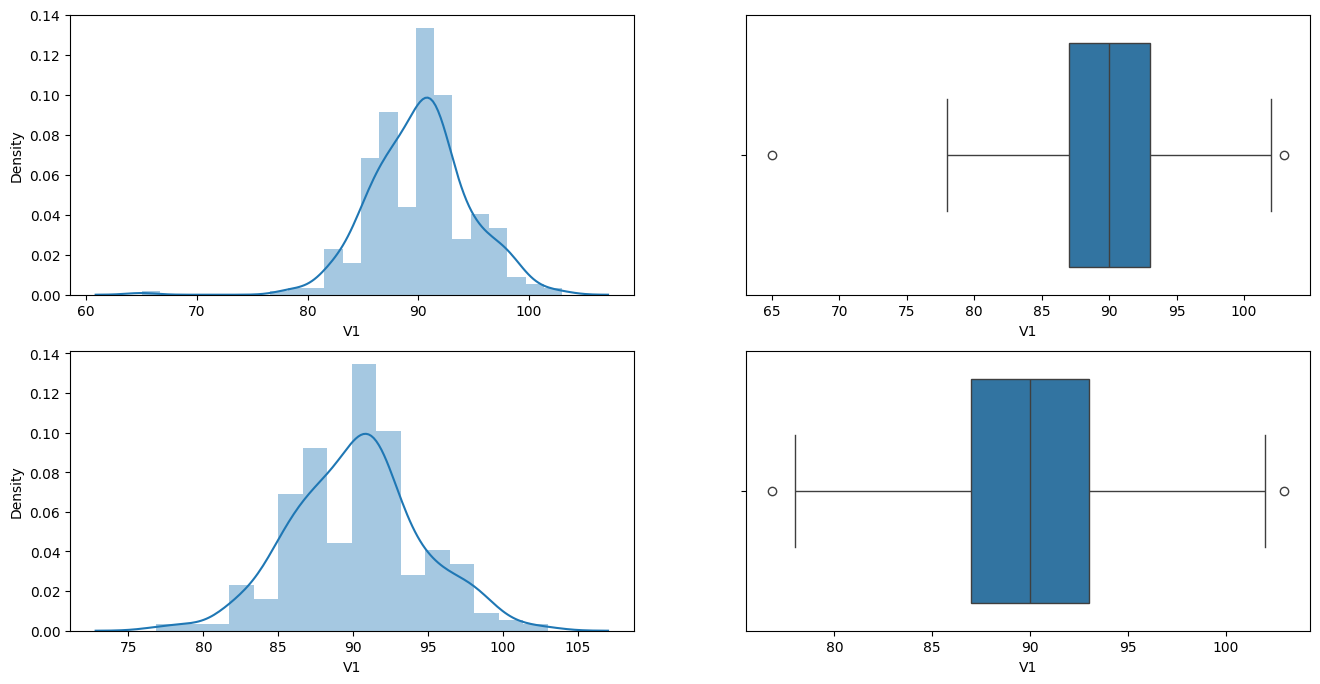

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data_X['V1'])
plt.subplot(2,2,2)
sns.boxplot(data_X['V1'], orient = "y")
plt.subplot(2,2,3)
sns.distplot(new_df_cap['V1'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['V1'], orient = "y")
plt.show()

In [ ]:
#2.Tratamiento 2
#Las variables no se aproximan a una distribución normal

In [ ]:
data_X = pd.DataFrame(data.drop('V7', axis = 1))
data_X.head()

,V1,V2,V3,V4,V5,V6
0,85,92,45,27,31,0.0
1,85,64,59,32,23,0.0
2,86,54,33,16,54,0.0
3,91,78,34,24,36,0.0
4,87,70,12,28,10,0.0


In [ ]:
#Encontrando RIC
percentile25 = data_X['V1'].quantile(0.25)
percentile75 = data_X['V1'].quantile(0.75)
ric = percentile75 - percentile25

In [ ]:
#Limitación de valores atípicos
upper_limit = percentile75 + 1.5 * ric
lower_limit = percentile25 - 1.5 * ric

In [ ]:
print(upper_limit)

102.0


In [ ]:
print(lower_limit)

78.0


In [ ]:
#Encontrando los valores atípicos
data_X[(data_X['V1'] > upper_limit) | (data_X['V1'] < lower_limit)]

,V1,V2,V3,V4,V5,V6
68,103,75,19,30,13,1.0
223,65,63,19,20,14,0.5


In [ ]:
#Recorte de valores atípicos
new_df = data_X[data_X['V1'] < upper_limit]
new_df.shape

(343, 6)

In [ ]:
#Aplicación de los límites
new_df_cap = data_X.copy()
new_df_cap['V1'] = np.where(
    new_df_cap['V1'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['V1'] < lower_limit,
        lower_limit,
        new_df_cap['V1']
    )
)

In [ ]:
#Encontrando los valores atípicos
new_df_cap[(new_df_cap['V1'] > upper_limit) | (new_df_cap['V1'] < lower_limit)]

,V1,V2,V3,V4,V5,V6


In [ ]:
new_df_cap.shape

(345, 6)

<ipython-input-48-4fca6824cd6d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_X['V1'])
<ipython-input-48-4fca6824cd6d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['V1'])


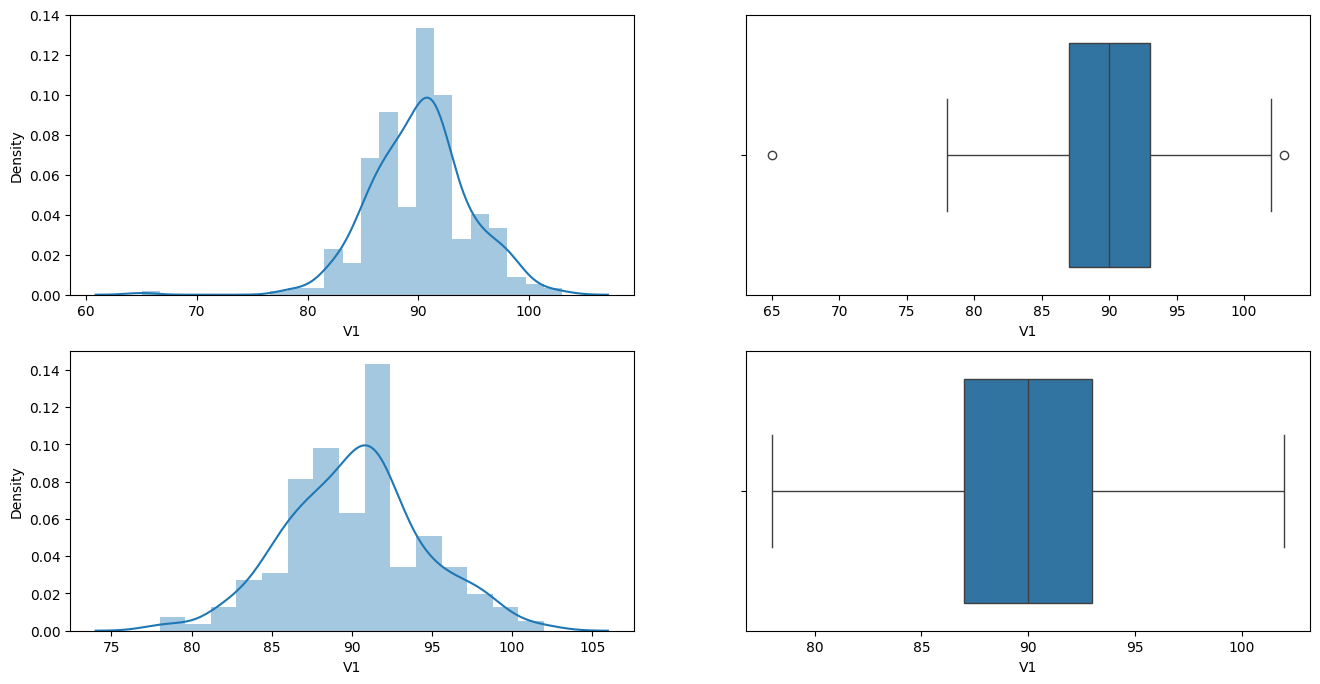

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data_X['V1'])
plt.subplot(2,2,2)
sns.boxplot(data_X['V1'], orient = "y")
plt.subplot(2,2,3)
sns.distplot(new_df_cap['V1'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['V1'], orient = "y")
plt.show()